In [ ]:
import pandas as pd
df =  pd.read_csv('melb_data.csv')

In [ ]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
print(df.isnull().sum())

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64


Columns with a large proportion of missing values might be dropped because imputing them accurately is difficult, which could introduce noise or bias.
in this case 'BuildingArea', 'YearBuilt', 'CouncilArea' those are the column which having a large missing values

In [ ]:
df = df.drop(columns=['BuildingArea', 'YearBuilt', 'CouncilArea'])

for column in ['Regionname', 'Type']:
    df[column].fillna(df[column].mode()[0], inplace=True)

for column in ['Car', 'Landsize']:
    df[column].fillna(df[column].median(), inplace=True)

df = df.dropna()

In [ ]:
print(df.isnull().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


The transformation and extraction are done to facilitate more granular and useful time-based analysis, while dropping the original Date column helps simplify the dataset by removing redundant information.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extracting year, month, and day of the week from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Dropping the original 'Date' column
df = df.drop(columns=['Date'])

In [ ]:
df['Year'].head()

0    2016
1    2016
2    2017
3    2017
4    2016
Name: Year, dtype: int32

In [ ]:
df['Month'].head()

0    12
1     2
2     3
3     3
4     6
Name: Month, dtype: int32

In [ ]:
df['DayOfWeek'].head()

0    5
1    3
2    5
3    5
4    5
Name: DayOfWeek, dtype: int32

In [ ]:
df.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,...,Month_8,Month_9,Month_10,Month_11,Month_12,DayOfWeek_0,DayOfWeek_1,DayOfWeek_3,DayOfWeek_5,DayOfWeek_6
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,...,False,False,False,False,True,False,False,False,True,False
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,...,False,False,False,False,False,False,False,True,False,False
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,...,False,False,False,False,False,False,False,False,True,False
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,-37.7969,144.9969,...,False,False,False,False,False,False,False,False,True,False
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,-37.8072,144.9941,...,False,False,False,False,False,False,False,False,True,False


One-Hot Encoding: Transforms categorical data into a numerical format that is suitable for machine learning algorithms, ensuring that each category is represented by a binary column.

In [ ]:
#This function converts specified categorical columns into multiple binary columns (0s and 1s)
df = pd.get_dummies(df, columns=['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Regionname', 'Year','Month', 'DayOfWeek'])# one-hot encoding
X = df.drop(columns=['Price'])
y = df['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RandomForestRegressor is used because the goal is to predict a continuous numerical value, specifically the Price of properties.n_estimators=10 that mean 10 binary tree will be created


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

randomFReg = RandomForestRegressor(n_estimators=10, random_state=42)
randomFReg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
y_pred_rf = randomFReg.predict(X_test)
y_pred_train = randomFReg.predict(X_train)

# Evaluate the Random Forest model
print('Random Forest Performance:')
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('RMSE:', mean_squared_error(y_test, y_pred_rf, squared=False))
print('R^2:', r2_score(y_test, y_pred_rf))
print('R^2 for X_train :', r2_score(y_train, y_pred_train))


Random Forest Performance:
MAE: 169169.42551546392
MSE: 77407845088.09686
RMSE: 278222.6538010463
R^2: 0.8051229978540762
R^2 for X_train : 0.9533363775659467


In [ ]:
import matplotlib.pyplot as plt


The feature importances in a random forest model are determined by evaluating how much each feature contributes to the reduction of impurity in the model's decision trees

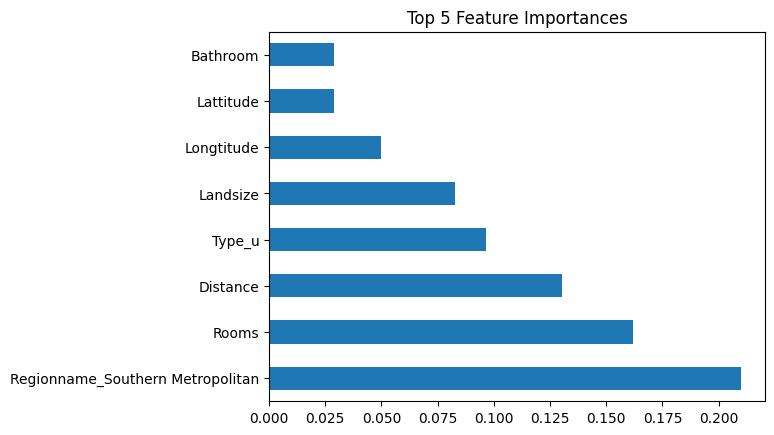

In [ ]:
feature_importances = pd.Series(randomFReg.feature_importances_, index=X_train.columns)
feature_importances.nlargest(8).plot(kind='barh')
plt.title('Top 5 Feature Importances')
plt.show()

In [ ]:
now plat the graph


SyntaxError: invalid syntax (<ipython-input-2-f15524e6b21e>, line 1)

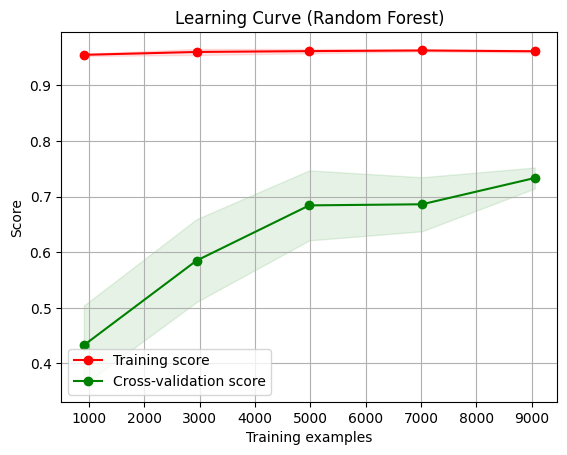

In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Calculate learning curves
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes
    )

    # Calculate mean and standard deviation for training and testing scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    # Plot the learning curve
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1, color="r"
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1, color="g"
    )
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve for Random Forest
plot_learning_curve(randomFReg, 'Learning Curve (Random Forest)', X, y, cv=3, n_jobs=-1)

plt.show()